In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df_index=pd.read_csv("economic_index.csv")

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#drop unnecessary columns
df_index.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
#check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


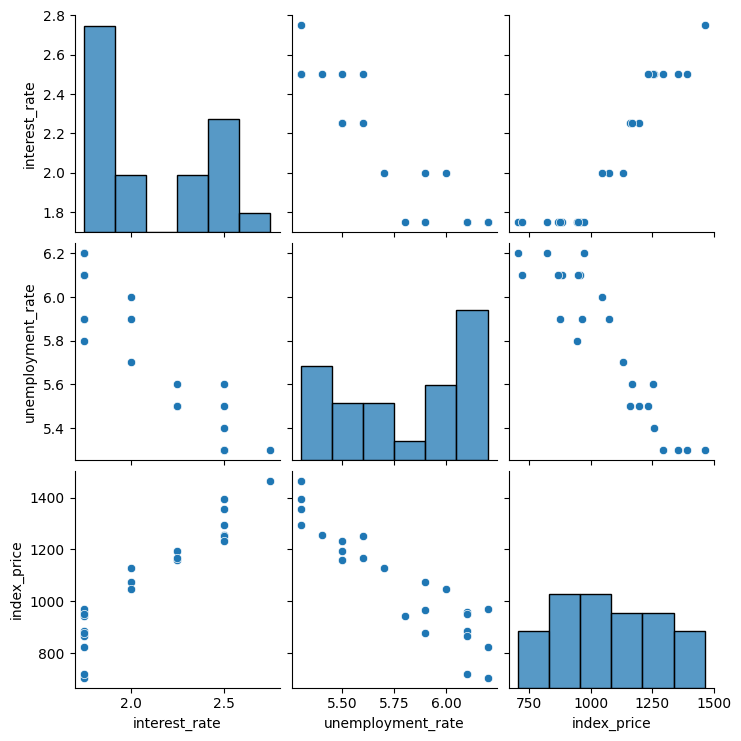

In [11]:
#visualization
sns.pairplot(df_index)

In [12]:
#correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

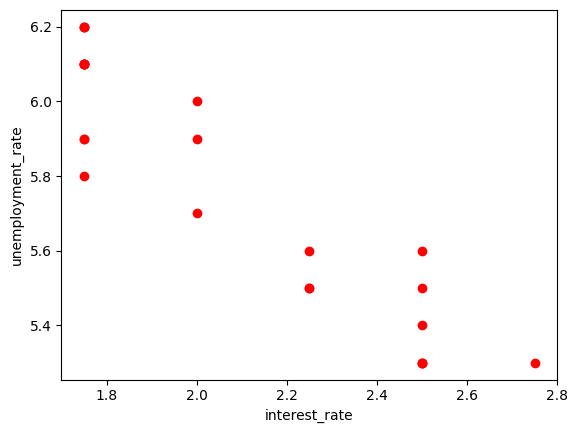

In [13]:
#visualize the datapoints more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [14]:
#independent and dependent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

<Axes: xlabel='interest_rate', ylabel='index_price'>

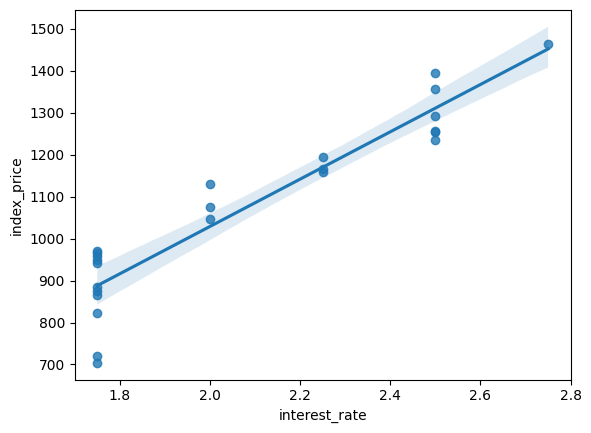

In [20]:
sns.regplot(x=df_index["interest_rate"], y=df_index["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

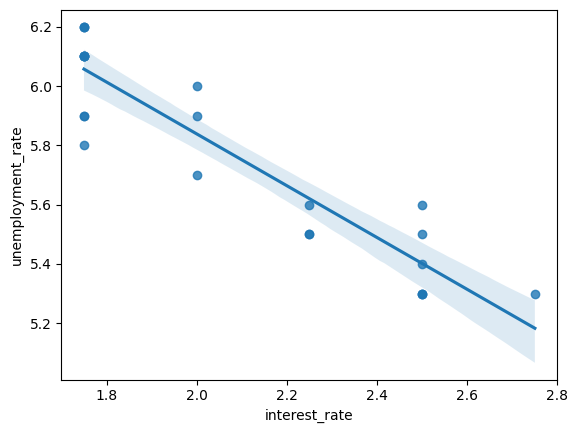

In [19]:
sns.regplot(x=df_index["interest_rate"], y=df_index["unemployment_rate"])

In [21]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
X_train

array([[-1.01512945,  0.39413171],
       [-1.01512945,  0.98532928],
       [-1.01512945,  1.28092806],
       [ 0.3904344 , -0.78826342],
       [ 1.09321633, -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.08386221],
       [ 1.09321633, -1.37946099],
       [ 1.09321633, -0.49266464],
       [-1.01512945,  0.98532928],
       [ 0.3904344 , -0.49266464],
       [ 0.3904344 , -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.37946099],
       [ 1.79599826, -1.37946099],
       [-1.01512945,  1.28092806],
       [-1.01512945,  0.98532928],
       [-0.31234752,  0.68973049]])

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()



In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [25]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [26]:
np.mean(validation_score)

np.float64(-3875.2750401898634)

In [27]:
#predication
y_pred=regression.predict(X_test)

In [28]:
y_pred

array([1089.17624198, 1127.99283867,  899.44410498,  977.07729837,
        957.66900002, 1468.64051598])

In [30]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

8634.281192947814
67.00238710853853
92.92083293292099
0.8159795332585089


In [31]:
#display adjusted R-Squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6932992220975149


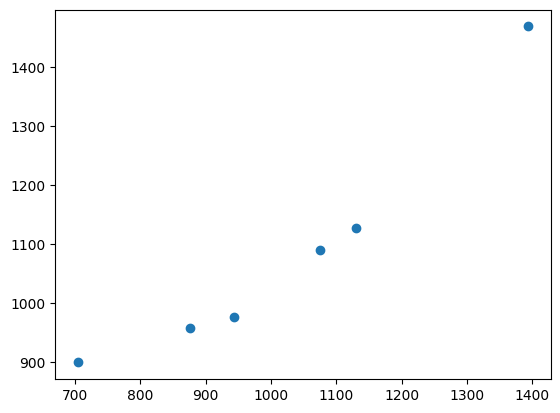

In [32]:
#Assumption
plt.scatter(y_test,y_pred)

In [33]:
residuals=y_test-y_pred
print(residuals)

11    -14.176242
10      2.007161
22   -195.444105
14    -34.077298
20    -81.669000
1     -74.640516
Name: index_price, dtype: float64


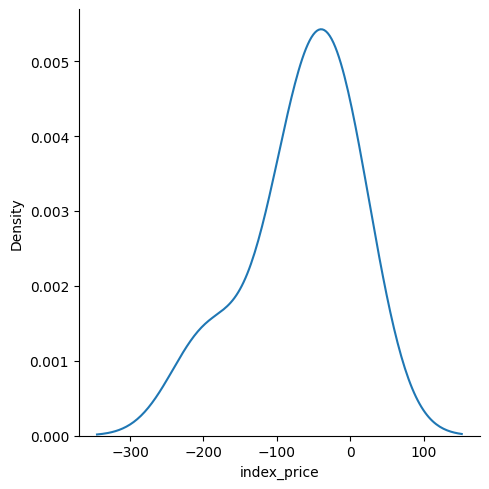

In [35]:
#plot this residuals
sns.displot(residuals,kind='kde')

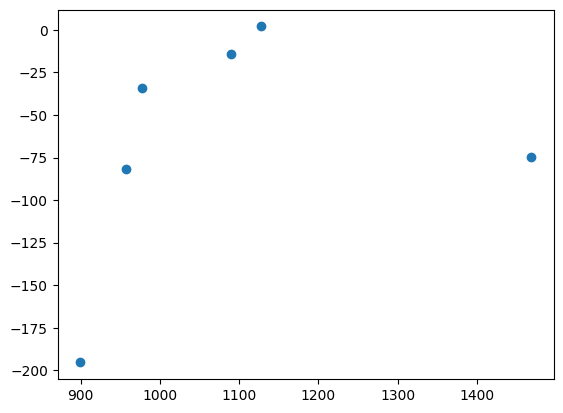

In [36]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [37]:
#OLS Linear Regression
import statmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

ModuleNotFoundError: No module named 'statmodels'

In [38]:
# OLS Linear Regression
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2464
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                       0.785
Time:                        13:29:34   Log-Likelihood:                         -151.40
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
print(regression.coef_)
print(regression.intercept_)

[140.34286806 -52.55792038]
1086.6666666666667
